Data from https://data.census.gov/table?q=population+county&tid=PEPPOP2019.PEPANNRES

In [4]:
using CSV
using DataFrames
using PyPlot
ENV["DATAFRAMES_ROWS"] = 6

6

In [5]:
df = CSV.read("./PEPPOP2019.PEPANNRES-2023-01-08T111700.csv", DataFrame)
first(df, 5)

Row,Geographic Area Name (Grouping),4/1/2010 Census population!!Population,4/1/2010 population estimates base!!Population,7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
,String,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15
1,"Autauga County, Alabama","54,571","54,597","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869"
2,"Baldwin County, Alabama","182,265","182,265","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234"
3,"Barbour County, Alabama","27,457","27,455","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686"
4,"Bibb County, Alabama","22,915","22,915","22,870","22,745","22,667","22,521","22,553","22,566","22,586","22,550","22,367","22,394"
5,"Blount County, Alabama","57,322","57,322","57,376","57,560","57,580","57,619","57,526","57,526","57,494","57,787","57,771","57,826"


In [6]:
# get rid of first two population columns as there are 3 columns for 2010
df = select(df, Not("4/1/2010 Census population!!Population"))
df = select(df, Not("4/1/2010 population estimates base!!Population"))

Row,Geographic Area Name (Grouping),7/1/2010 population estimate!!Population,7/1/2011 population estimate!!Population,7/1/2012 population estimate!!Population,7/1/2013 population estimate!!Population,7/1/2014 population estimate!!Population,7/1/2015 population estimate!!Population,7/1/2016 population estimate!!Population,7/1/2017 population estimate!!Population,7/1/2018 population estimate!!Population,7/1/2019 population estimate!!Population
,String,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15
1,"Autauga County, Alabama","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869"
2,"Baldwin County, Alabama","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234"
3,"Barbour County, Alabama","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686"
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3218,"Villalba Municipio, Puerto Rico","26,001","25,542","25,135","24,745","24,256","23,662","23,091","22,452","21,436","21,372"
3219,"Yabucoa Municipio, Puerto Rico","37,874","37,361","36,844","36,377","35,732","35,076","34,363","33,519","32,254","32,282"
3220,"Yauco Municipio, Puerto Rico","41,828","41,036","40,249","39,492","38,535","37,585","36,654","35,474","33,853","33,575"


In [7]:
# rename columns to be less wieldy
#rename!(df, "Geographic Area Name (Grouping)" => "County")
rename!(df,["County","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"])

Row,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,String,String15,String15,String15,String15,String15,String15,String15,String15,String15,String15
1,"Autauga County, Alabama","54,773","55,227","54,954","54,727","54,893","54,864","55,243","55,390","55,533","55,869"
2,"Baldwin County, Alabama","183,112","186,558","190,145","194,885","199,183","202,939","207,601","212,521","217,855","223,234"
3,"Barbour County, Alabama","27,327","27,341","27,169","26,937","26,755","26,283","25,806","25,157","24,872","24,686"
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3218,"Villalba Municipio, Puerto Rico","26,001","25,542","25,135","24,745","24,256","23,662","23,091","22,452","21,436","21,372"
3219,"Yabucoa Municipio, Puerto Rico","37,874","37,361","36,844","36,377","35,732","35,076","34,363","33,519","32,254","32,282"
3220,"Yauco Municipio, Puerto Rico","41,828","41,036","40,249","39,492","38,535","37,585","36,654","35,474","33,853","33,575"


In [8]:
df = mapcols(ByRow(y -> parse(Int, replace(y, "," => ""))), df[:, 2:11])

Row,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3218,26001,25542,25135,24745,24256,23662,23091,22452,21436,21372
3219,37874,37361,36844,36377,35732,35076,34363,33519,32254,32282
3220,41828,41036,40249,39492,38535,37585,36654,35474,33853,33575


In [15]:
p(d)=log(10,1+1/d)

p (generic function with 1 method)

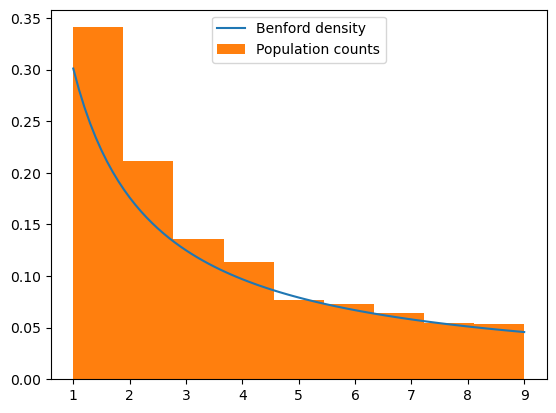

In [23]:
pop = df."2010"
first_digs = [first(reverse(digits(n))) for n in pop]
    
x_axis = 1:.1:9
benford_values = map(t->p(t), x_axis)
plot(x_axis, benford_values, label="Benford density")
    
hist(first_digs, 9, density=true, label="Population counts")
legend(loc="upper center")
;

In [ ]:
Next steps
- Plot second digit
- Plot third digits